# Introduction:

This dataset is a dataset containing various attributes of mobile phones, which can be used to build a machine learning model for predicting price ranges of mobile devices. 
<br>
<br>
The goal of this project is to develop a machine learning model that can predict the price range of a mobile phone based on its various attributes.


# Dataset Content:
The dataset includes features such as:
● Id : ID.
<br>
● battery_power : Total energy a battery can store in one time measured in mAh.
<br>
● blue : Has bluetooth or not.
<br>
● clock_speed : speed at which microprocessor executes instructions.
<br>
● dual_sim : Has dual sim support or not.
<br>
● fc : Front Camera megapixels.
<br>
● four_g : Has 4G or not.
<br>
● int_memory : Internal Memory in Gigabytes.
<br>
● m_dep : Mobile Depth in cm.
<br>
● mobile_wt : Weight of mobile phone.
<br>
● n_cores : Number of cores of processor.
<br>
● pc : Primary Camera megapixels.
<br>
● px_height : Pixel Resolution Height.
<br>
● px_width : Pixel Resolution Width.
<br>
● ram : Random Access Memory in Megabytes.
<br>
● sc_h : Screen Height of mobile in cm.
<br>
● sc_w : Screen Width of mobile in cm.
<br>
● talk_time : longest time that a single battery charge will last.
<br>
● three_g : has 3g or not.
<br>
● touch_screen : Has touch screen or not.
<br>
● wifi : has wifi or not.
<br>
● price_range: This is the target variable with values of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

# Importing our Libraries and Modules:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter # To adjust the ticks formatting
import plotly.express as px
import warnings
warnings.filterwarnings('ignore') # To ignore warning messages

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate

import pickle

---------------------

# Data Preparation and Preprocessing

In [2]:
# Loading our datasets:
df_train = pd.read_csv("Data/train.csv")
df_test = pd.read_csv("Data/test.csv")

In [3]:
df_train

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

In [4]:
df_test

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0       1           1043     1          1.8         1  14       0           5   
1       2            841     1          0.5         1   4       1          61   
2       3           1807     1          2.8         0   1       0          27   
3       4           1546     0          0.5         1  18       1          25   
4       5           1434     0          1.4         0  11       1          49   
..    ...            ...   ...          ...       ...  ..     ...         ...   
995   996           1700     1          1.9         0   0       1          54   
996   997            609     0          1.8         1   0       0          13   
997   998           1185     0          1.4         0   1       1           8   
998   999           1533     1          0.5         1   0       0          50   
999  1000           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193  ...  16        226      1412  3476    12     7   
1      0.8        191  ...  12        746       857  3895     6     0   
2      0.9        186  ...   4       1270      1366  2396    17    10   
3      0.5         96  ...  20        295      1752  3893    10     0   
4      0.5        108  ...  18        749       810  1773    15     8   
..     ...        ...  ...  ..        ...       ...   ...   ...   ...   
995    0.5        170  ...  17        644       913  2121    14     8   
996    0.9        186  ...   2       1152      1632  1933     8     1   
997    0.5         80  ...  12        477       825  1223     5     0   
998    0.4        171  ...  12         38       832  2509    15    11   
999    0.1        140  ...  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  
0            2        0             1     0  
1            7        1             0     0  
2           10        0             1     1  
3            7        1             1     0  
4            7        1             0     1  
..         ...      ...           ...   ...  
995         15        1             1     0  
996         19        0             1     1  
997         14        1             0     0  
998          6        0             1     0  
999          3        1             0     1  

[1000 rows x 21 columns]

We can notice that both datasets are almost identical in their columns except for the **taregt "price_range" in the "train" dataset and the "id" feature in the "test" dataset**.

So, we need to drop those different columns in order to merge both datasets for analysis purposes, but before that let's have a glimpse on the "price_range" statistics and visualization:

In [5]:
df_train.price_range.describe()

count    2000.000000
mean        1.500000
std         1.118314
min         0.000000
25%         0.750000
50%         1.500000
75%         2.250000
max         3.000000
Name: price_range, dtype: float64

We can see that it's normally distributed.

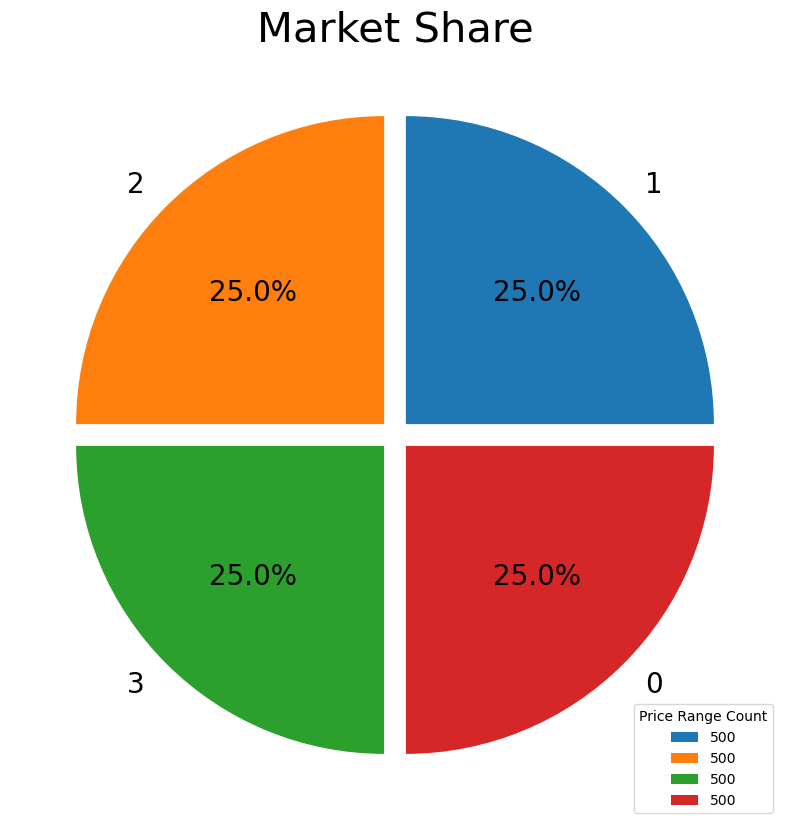

In [6]:
labels = df_train.price_range.value_counts().index
sizes = df_train.price_range.value_counts()

plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, 
        explode=[0.05, 0.05, 0.05, 0.05])
plt.title('Market Share',color = 'black',fontsize = 30)
plt.legend(df_train.price_range.value_counts(), loc = 'lower right', title = 'Price Range Count')
plt.show()

### We can also see that our target is balanced, which indicates that we can use Accuracy metric for our evaluation.

In [7]:
df1 = df_train.copy()
df1.drop("price_range", axis = 1, inplace = True)
df2 = df_test.copy()
df2.drop("id", axis = 1, inplace = True)

In [8]:
df = pd.concat([df1, df2])
df

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0              842     0          2.2         0   1       0           7   
1             1021     1          0.5         1   0       1          53   
2              563     1          0.5         1   2       1          41   
3              615     1          2.5         0   0       0          10   
4             1821     1          1.2         0  13       1          44   
..             ...   ...          ...       ...  ..     ...         ...   
995           1700     1          1.9         0   0       1          54   
996            609     0          1.8         1   0       0          13   
997           1185     0          1.4         0   1       1           8   
998           1533     1          0.5         1   0       0          50   
999           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0      0.6        188        2   2         20       756  2549     9     7   
1      0.7        136        3   6        905      1988  2631    17     3   
2      0.9        145        5   6       1263      1716  2603    11     2   
3      0.8        131        6   9       1216      1786  2769    16     8   
4      0.6        141        2  14       1208      1212  1411     8     2   
..     ...        ...      ...  ..        ...       ...   ...   ...   ...   
995    0.5        170        7  17        644       913  2121    14     8   
996    0.9        186        4   2       1152      1632  1933     8     1   
997    0.5         80        1  12        477       825  1223     5     0   
998    0.4        171        2  12         38       832  2509    15    11   
999    0.1        140        6  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  
0           19        0             0     1  
1            7        1             1     0  
2            9        1             1     0  
3           11        1             0     0  
4           15        1             1     0  
..         ...      ...           ...   ...  
995         15        1             1     0  
996         19        0             1     1  
997         14        1             0     0  
998          6        0             1     0  
999          3        1             0     1  

[3000 rows x 20 columns]

Now we can do our exploration and analysis.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  3000 non-null   int64  
 1   blue           3000 non-null   int64  
 2   clock_speed    3000 non-null   float64
 3   dual_sim       3000 non-null   int64  
 4   fc             3000 non-null   int64  
 5   four_g         3000 non-null   int64  
 6   int_memory     3000 non-null   int64  
 7   m_dep          3000 non-null   float64
 8   mobile_wt      3000 non-null   int64  
 9   n_cores        3000 non-null   int64  
 10  pc             3000 non-null   int64  
 11  px_height      3000 non-null   int64  
 12  px_width       3000 non-null   int64  
 13  ram            3000 non-null   int64  
 14  sc_h           3000 non-null   int64  
 15  sc_w           3000 non-null   int64  
 16  talk_time      3000 non-null   int64  
 17  three_g        3000 non-null   int64  
 18  touch_scr

In [10]:
df.describe().T

count         mean          std    min      25%     50%  \
battery_power  3000.0  1241.849000   437.063804  500.0   863.75  1232.0   
blue           3000.0     0.502000     0.500079    0.0     0.00     1.0   
clock_speed    3000.0     1.528467     0.820358    0.5     0.70     1.5   
dual_sim       3000.0     0.512000     0.499939    0.0     0.00     1.0   
fc             3000.0     4.404000     4.383742    0.0     1.00     3.0   
four_g         3000.0     0.510000     0.499983    0.0     0.00     1.0   
int_memory     3000.0    32.581667    18.152810    2.0    16.00    33.0   
m_dep          3000.0     0.507000     0.285969    0.1     0.20     0.5   
mobile_wt      3000.0   140.003000    35.213809   80.0   109.00   140.0   
n_cores        3000.0     4.456333     2.289361    1.0     2.00     4.0   
pc             3000.0     9.962333     6.073923    0.0     5.00    10.0   
px_height      3000.0   639.112333   440.202998    0.0   277.75   564.0   
px_width       3000.0  1247.601667   434.666168  500.0   865.00  1248.0   
ram            3000.0  2129.141333  1085.694231  256.0  1212.75  2147.5   
sc_h           3000.0    12.202667     4.251151    5.0     9.00    12.0   
sc_w           3000.0     5.616667     4.322494    0.0     2.00     5.0   
talk_time      3000.0    11.035667     5.474400    2.0     6.00    11.0   
three_g        3000.0     0.759667     0.427357    0.0     1.00     1.0   
touch_screen   3000.0     0.502000     0.500079    0.0     0.00     1.0   
wifi           3000.0     0.507000     0.500034    0.0     0.00     1.0   

                   75%     max  
battery_power  1619.00  1999.0  
blue              1.00     1.0  
clock_speed       2.30     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           6.00     8.0  
pc               15.00    20.0  
px_height       932.50  1960.0  
px_width       1634.00  1998.0  
ram            3065.25  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0

We can see that we have a high variance in our dataset scaling, so we are going to need to scale all the features together to avoid any bias in our prediction.

We can also see that there are some outliers in our dataset and there are **no missing data**.

Last but not least, we can see also some skewness accross some of our features, which will be shown in the visualization section.

In [11]:
df.drop_duplicates().shape

(3000, 20)

As we can see there are no duplicates either.

# Data Visualization (Exploratory Data Analysis):

#### Let's first explore our data distribution for both of datasets:

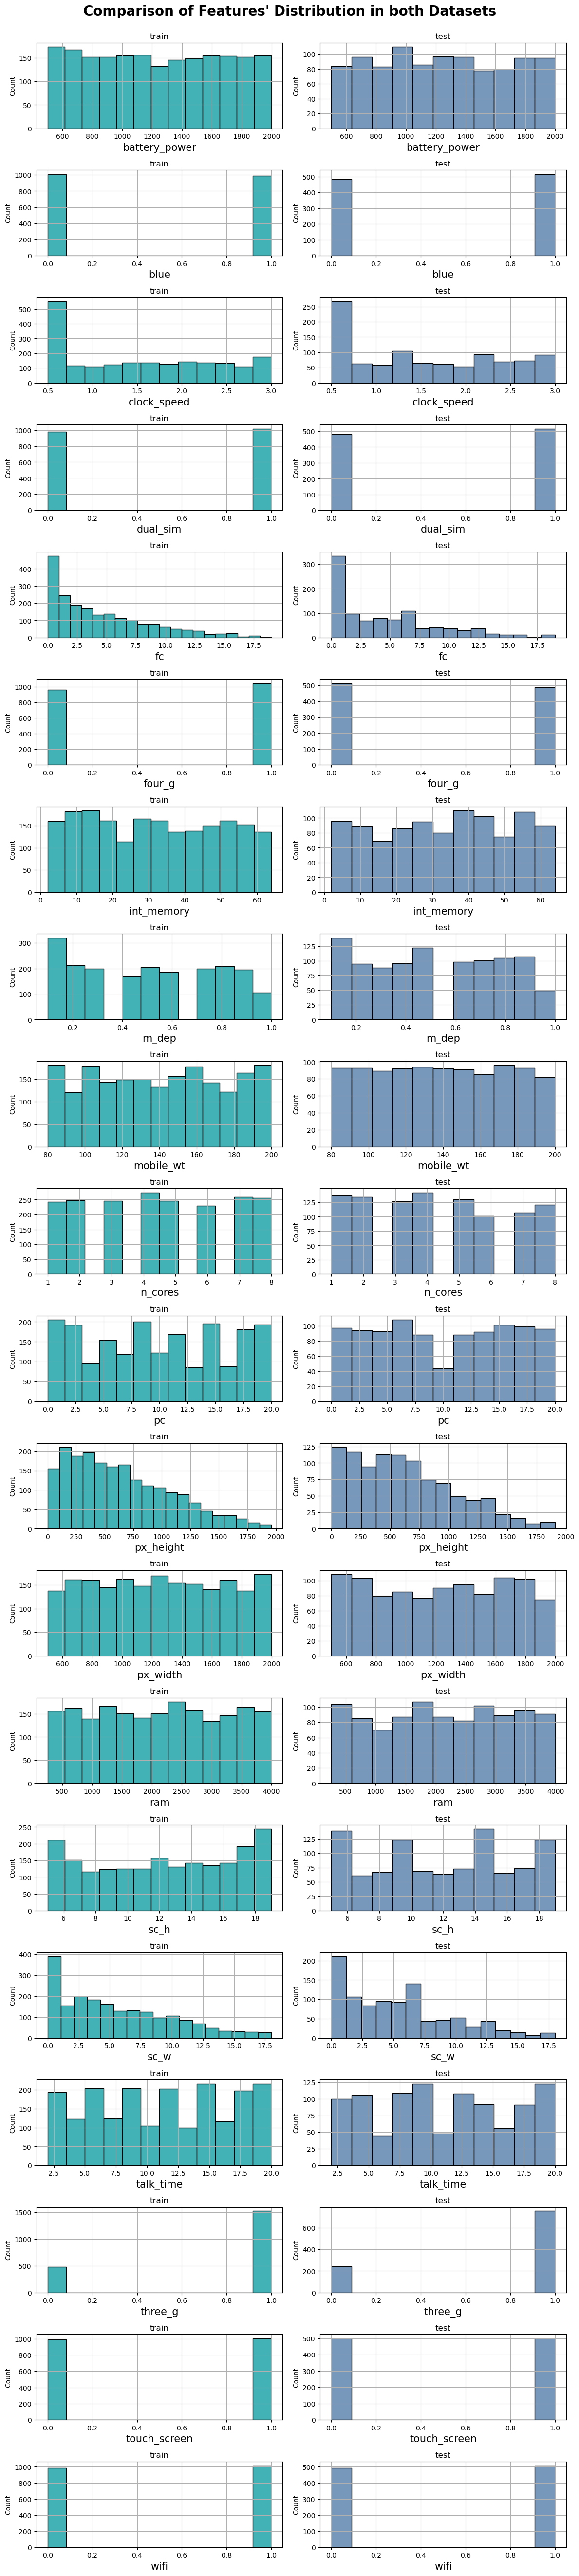

In [12]:
plt.figure(figsize = (12,55))
i = 0
for index, col in enumerate(list(df1.columns.values)):
    i += 1 ;
    plt.subplot(21,2, index + i)
    ax = sns.histplot(x = col, data = df1, color = "#03989e")
    plt.xlabel(col, size = 15)
    plt.title('train')
    plt.grid()
    
    plt.subplot(21,2, index + (i+1))
    ax = sns.histplot(x = col, data = df2, color = "#4974a5")
    plt.xlabel(col, size = 15)
    plt.title('test')
    plt.grid()

plt.suptitle("Comparison of Features' Distribution in both Datasets", y = 1, x = 0.50, size = 20,
    fontweight = "bold")
plt.tight_layout()
plt.show()

### From the above plots we can deduce that:
- both datasets have a very similar distributions despite their differences.

- Categorical data can be spotted easily as they are the ones with only two distant bars.

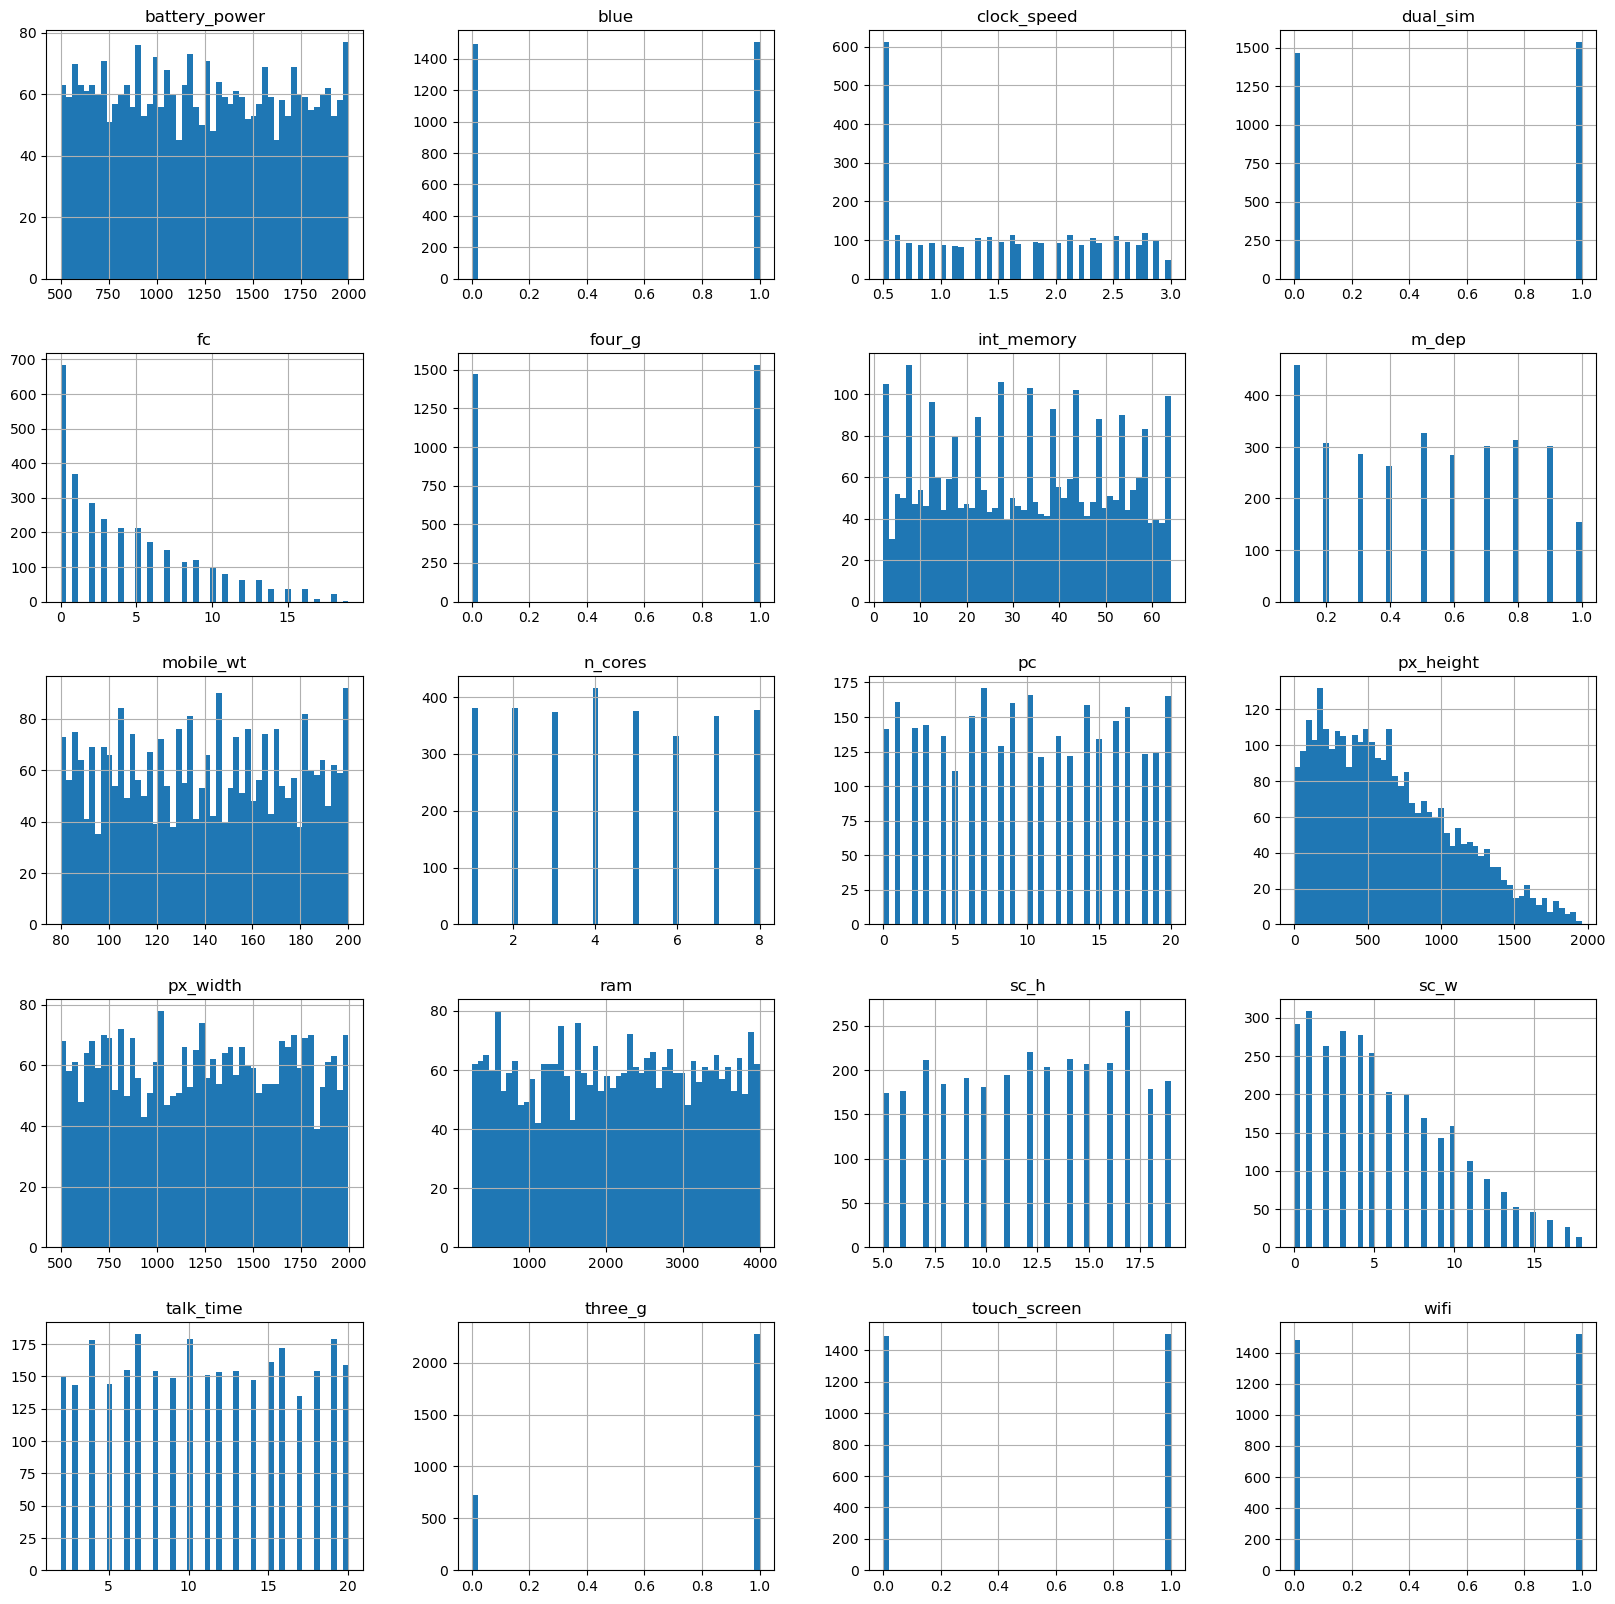

In [13]:
# Overall (total) distribution:
df.hist(bins = 50 , figsize= (20,20))
plt.show()

### We can notice the following for the various attributes of our mobile phones:
- Battery power, pixel width, ram, and talk time are well distributed among the mobile phones.
- Only very few mobile phones have high front camera megapixels and pixel heights.
- Almost all categorical features are even except for the "three_g" feature in which we can see that most mobile phones have 3g network which is highly required. So, the number of phones with no 3g is not extremely lower than those phones with 3g network.
- While other phones are pretty close in their categroical attributes (for example: **number of bluetooth phones** are close to **number of phones without bluetooth**)


### We can also notice from those various distributions that our data is obviously non-linear.

In [14]:
# Let's divide our features to numerical and categorical:
num_feats=df.drop(['blue','dual_sim','four_g','n_cores', 'three_g','touch_screen','wifi'], axis = 1)

cat_feats=df[['blue','dual_sim','four_g','n_cores', 'three_g','touch_screen','wifi']]

In [15]:
fig = px.box(num_feats)
fig.show()

#### This plot can give us a perfect illustration to our scaling variations among our features in this dataset that we have discussed earlier.

#### By zooming in and out to all those box plots we can find that as mentioned we have some outliers in our dataset such as the ones found in the "px_height" feature, which can be seen in the following snipped shot:
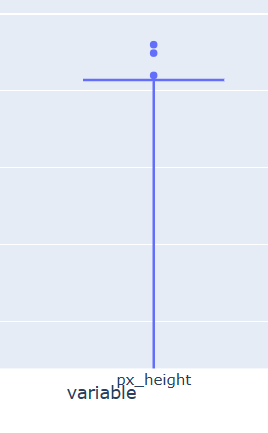

#### And, the ones found in the "fc" feature:
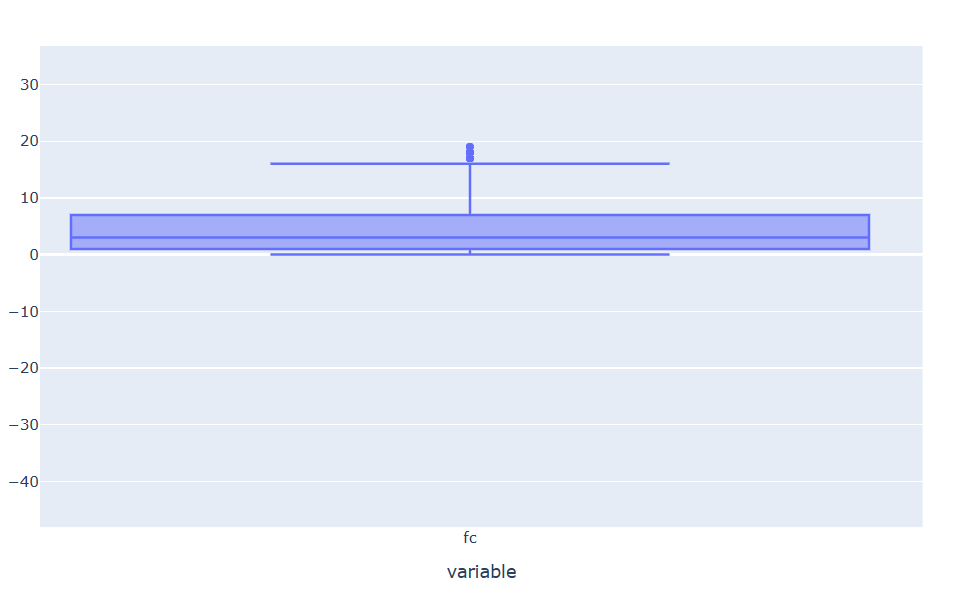
<br>
    <br>
#### We can also see, that as mentioned there are some skewness in those features due to those outliers.


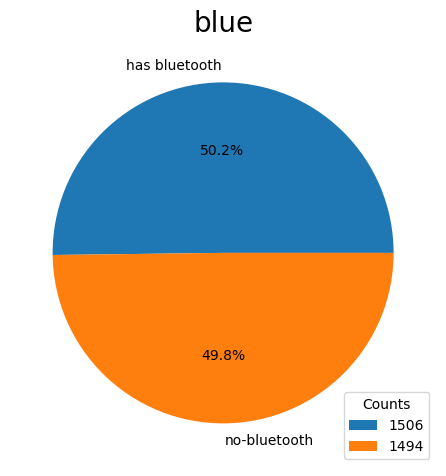

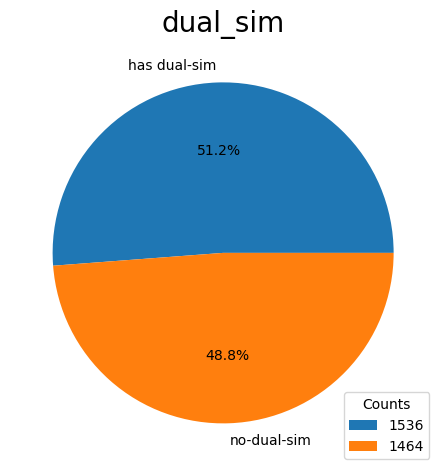

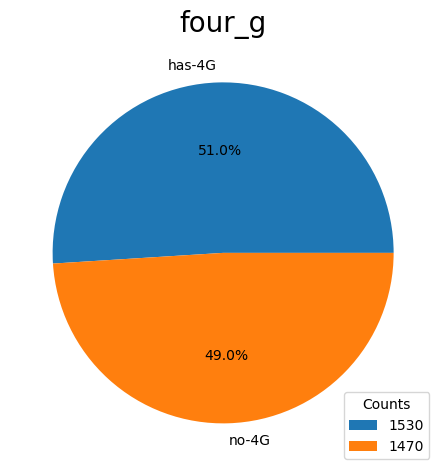

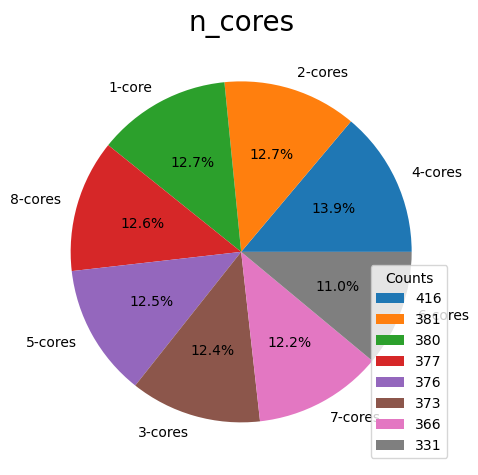

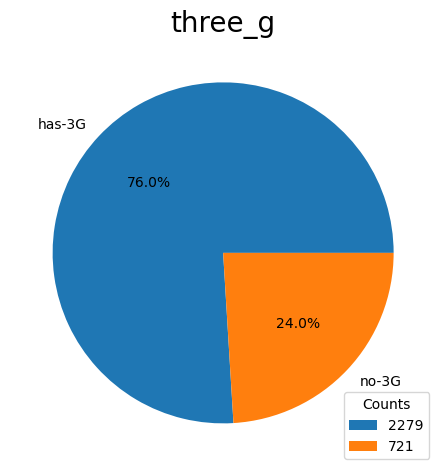

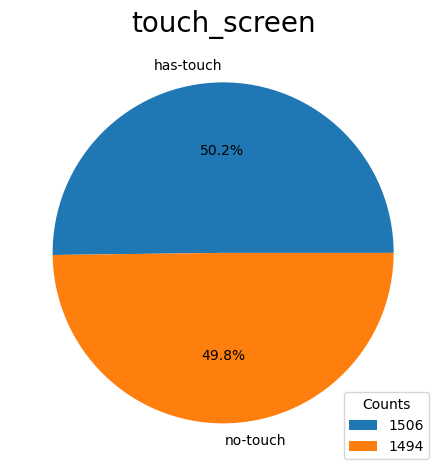

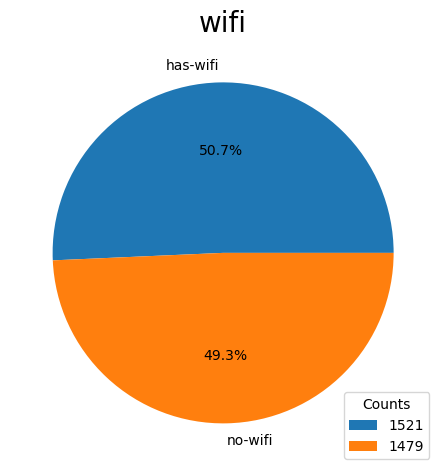

In [16]:
new_df = df.replace(to_replace={'blue':[0,1],'dual_sim':[0,1],'four_g':[0,1],
                      'n_cores':[1,2,3,4,5,6,7,8],'three_g':[0,1],'touch_screen':[0,1],'wifi':[0,1]},
           value={'blue':['no-bluetooth','has bluetooth'],
                  'dual_sim':['no-dual-sim','has dual-sim'],
                 'four_g':['no-4G','has-4G'],
                 'n_cores':['1-core','2-cores','3-cores','4-cores','5-cores','6-cores','7-cores','8-cores'],
                 'three_g':['no-3G','has-3G'],
                 'touch_screen':['no-touch','has-touch'],
                 'wifi':['no-wifi','has-wifi']})
for i,c in enumerate(cat_feats):
    plt.figure(figsize =(5.5, 6.5))
    plt.pie(new_df[c].value_counts(), labels=list(new_df[c].value_counts().index),autopct='%1.1f%%')
    plt.legend(new_df[c].value_counts(), loc = 'lower right', title = "Counts")
    plt.title(c, fontsize=20)

#### The above charts are backing up the statement from before that said that almost all the categorical features are approximately evenly distributed except for the "three_g" feature of which chart we found that the 721 of the phones have no 3g network with a percentage of 24%.


# Detecting and Handling our Outliers:

#### For common convenience and as recommended in most cases, I'm not going to try to detect or drop the outliers in the test set.

<Axes: xlabel='px_height'>

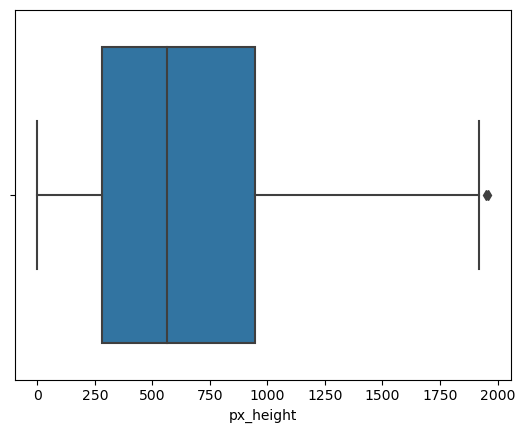

In [17]:
# Let's first visualize our major outliers:
sns.boxplot(x=df_train['px_height'])

Here is another glimpse to the outliers in the "px_height" feature.

In [18]:
def outlier_range(c):
    q1 = df_train[c].quantile(0.25)
    q3 = df_train[c].quantile(0.75)
    iqr = q3-q1
    maximum = q3 + (1.5 * iqr)
    minimum = q1 - (1.5 * iqr)
    return print(f"The range is from {minimum} to {maximum}.")

In [19]:
outlier_range("px_height")

The range is from -714.0 to 1944.0.


In [20]:
df_train[df_train['px_height']>1944]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
988            1413     1          0.5         1   4       1          45   
1771           1230     1          1.6         0   0       1          48   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
988     0.4        104        5  ...       1949      1994  2973    17     8   
1771    0.7        111        7  ...       1960      1963  1622    18    17   

      talk_time  three_g  touch_screen  wifi  price_range  
988          15        1             0     1            3  
1771         16        1             1     1            2  

[2 rows x 21 columns]

<Axes: xlabel='fc'>

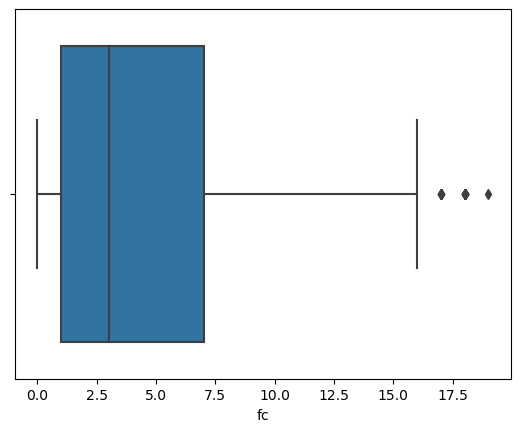

In [21]:
sns.boxplot(x=df_train['fc'])

Here is another glimpse to the outliers in the "fc" feature.

In [22]:
outlier_range("fc")

The range is from -8.0 to 16.0.


In [23]:
df_train[df_train['fc']>16]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
95             1137     1          1.0         0  18       0           7   
169            1569     0          2.8         1  17       0          44   
226            1708     1          2.4         1  18       1          49   
229            1689     0          1.8         0  17       0          24   
300            1937     1          1.7         0  17       0          58   
305            1348     0          2.0         0  18       0          52   
372            1703     1          1.5         1  17       1          55   
584             946     1          2.6         1  17       0           5   
1387           1533     1          1.1         1  18       1          17   
1406           1731     1          2.3         1  18       0          60   
1416           1448     0          0.5         1  18       0           2   
1549           1772     1          1.6         0  17       1          45   
1554           1957     0          1.2         1  18       1          36   
1693            695     0          0.5         0  18       1          12   
1705           1290     1          1.4         1  19       1          35   
1880           1720     0          1.6         0  18       1           2   
1882            591     0          2.1         1  18       1          16   
1888           1544     0          2.4         0  18       1          12   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
95      1.0        196        3  ...        942      1179  3616    13     5   
169     0.3        110        4  ...         45      1942  1260     9     2   
226     0.1        109        1  ...        233       517  3388     6     4   
229     0.3        127        3  ...        954      1200  2766     7     2   
300     0.6        189        1  ...       1728      1767  3321     5     4   
305     0.3         98        3  ...       1869      1942   955    18    11   
372     0.7        138        5  ...       1411      1711  2993     5     1   
584     0.1        166        3  ...       1698      1771  3720    15     7   
1387    0.3        160        4  ...       1054      1393  2520     8     2   
1406    0.5        171        4  ...        142      1039  1220     9     3   
1416    0.2        100        5  ...        846      1144   593     9     4   
1549    0.5        159        2  ...        837      1405  1146     6     1   
1554    0.8        151        2  ...       1194      1727  1115    16     2   
1693    0.6        196        2  ...       1649      1829  2855    16    13   
1705    0.3        110        4  ...        405       742   879    16     2   
1880    0.8        188        5  ...        334       896  2522    10     5   
1882    0.5        196        7  ...        952      1726   704    14     5   
1888    0.1        186        7  ...        470       844   489     9     4   

      talk_time  three_g  touch_screen  wifi  price_range  
95           12        1             1     1            3  
169          17        1             0     0            1  
226          16        1             1     1            3  
229           7        0             1     1            3  
300          14        1             1     0            3  
305           7        1             1     1            1  
372          20        1             1     1            3  
584           4        0             1     0            3  
1387         11        1             0     1            2  
1406         20        0             1     0            1  
1416         18        1             1     1            0  
1549         17        1             1     0            1  
1554         18        1             0     1            1  
1693          7        1             1     1            2  
1705          8        1             0     0            0  
1880          2        1             0     1            2  
1882          4        1             1 

<Axes: xlabel='sc_w'>

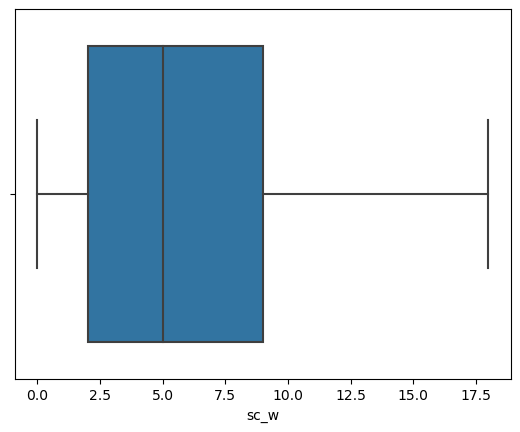

In [24]:
sns.boxplot(x=df_train['sc_w'])

In [25]:
outlier_range("sc_w")

The range is from -8.5 to 19.5.


In [26]:
df_train[df_train['sc_w']>19.5]

Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

[0 rows x 21 columns]

#### In order to try to save the data and not to lose anything to maintain generalization in our dataset, I decided to keep those minimal outliers and see the evaluation of the model, and get back to them if anything unexpected occurs due to my evaluation to the model.

# Feature Engineering:

#### First, I'll also check the evaluation without doing any scalling to the dataset in order to see if the model can work without even the need for scalling.

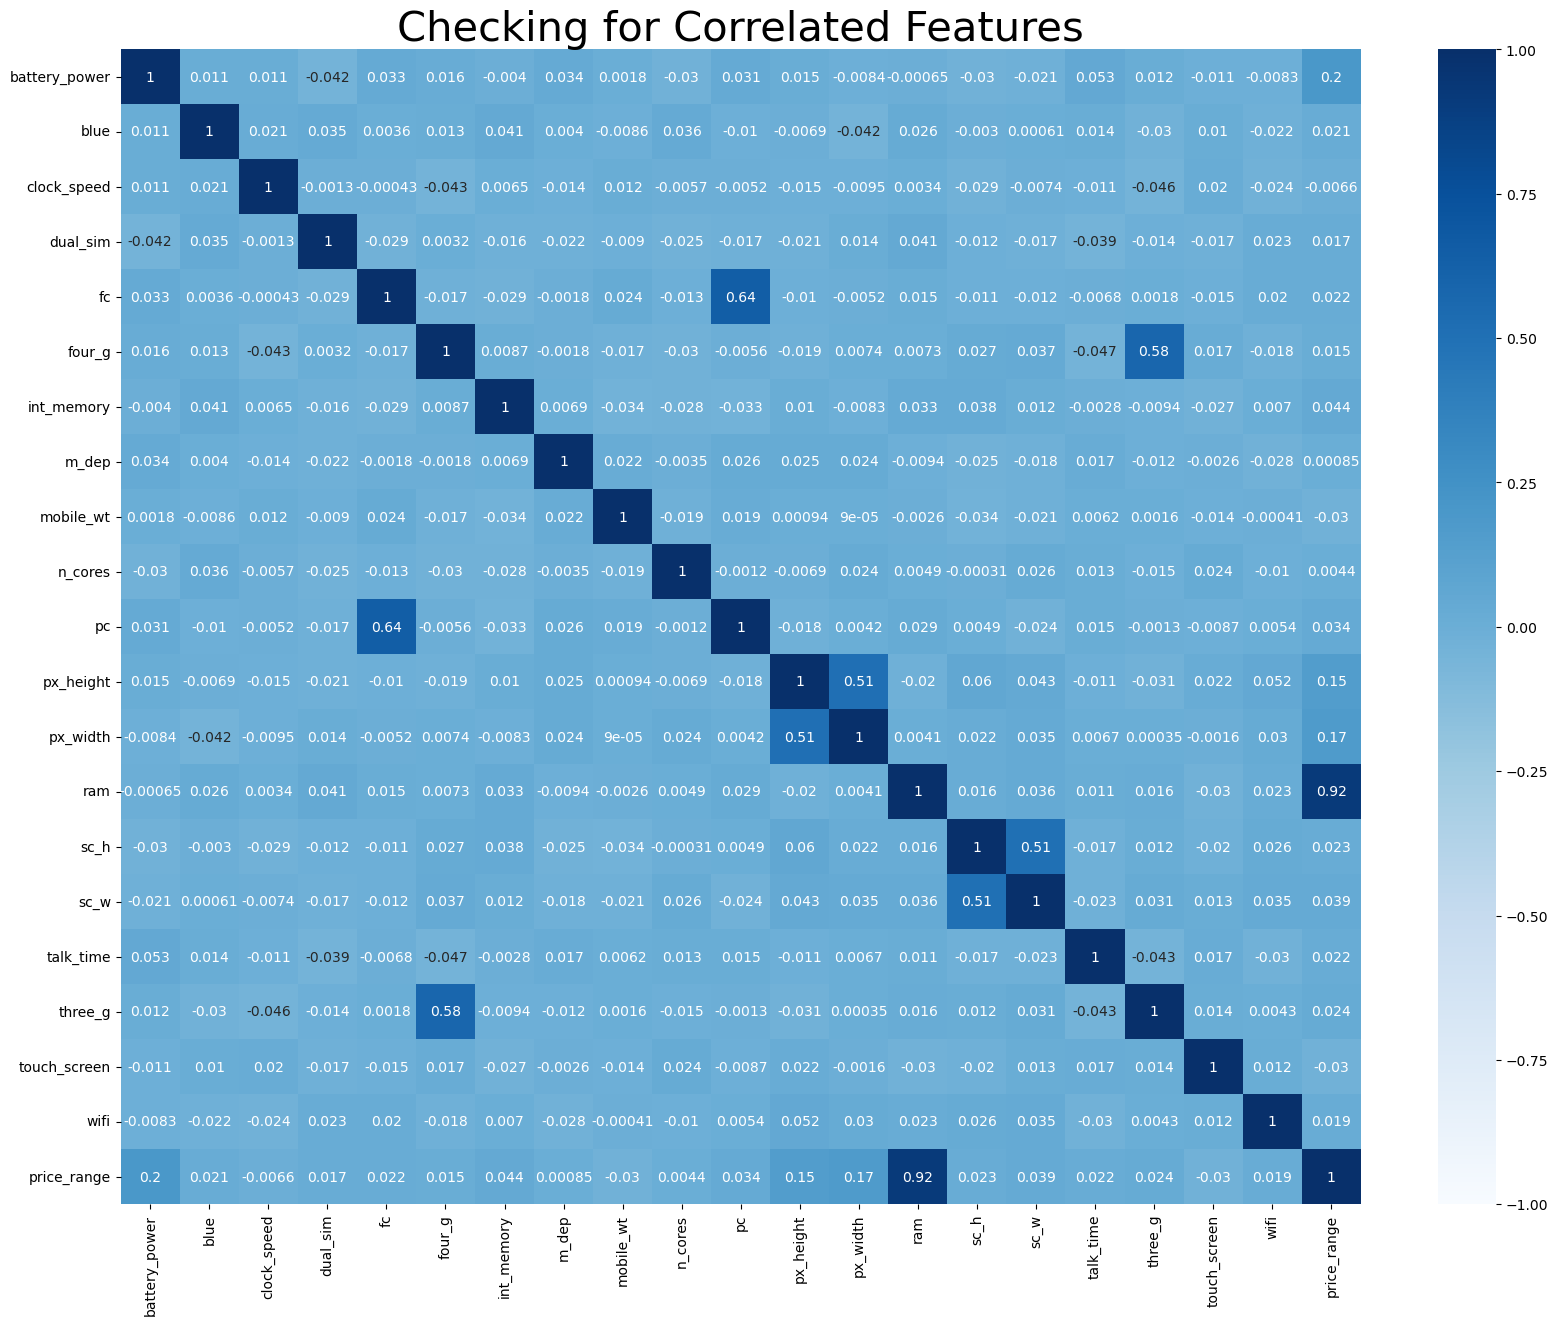

In [27]:
# let's check for the correlation accross the train set:
fig, ax = plt.subplots(1,1,figsize=(20, 15))
sns.heatmap(df_train.corr(), annot = True, cmap = "Blues", vmin = -1, vmax = 1,)
plt.title('Checking for Correlated Features', color = 'black', fontsize = 30)
plt.show()

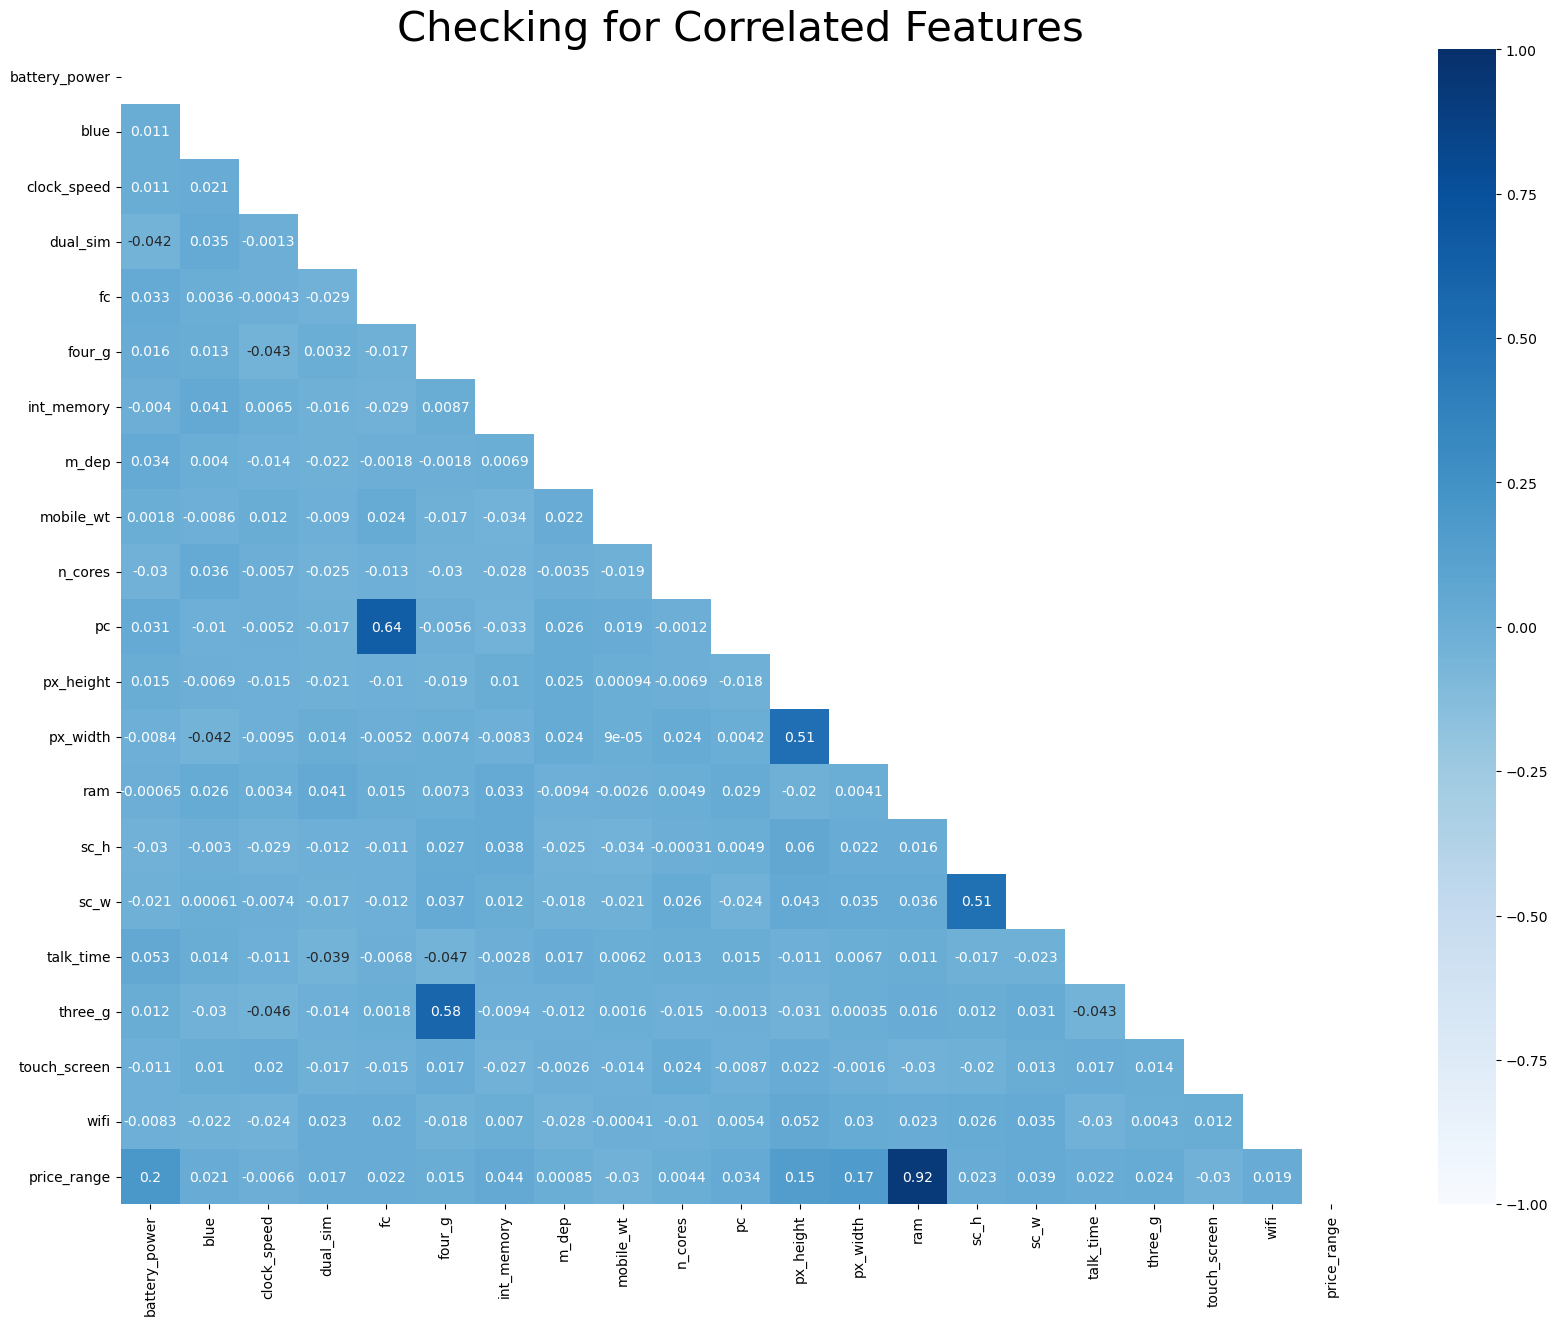

In [28]:
# How about we apply our mask to the figure for a clear view:
fig, ax = plt.subplots(1,1,figsize=(20, 15))
mask=np.triu(np.ones_like(df_train.corr()))
sns.heatmap(df_train.corr(), annot = True, cmap = "Blues", vmin = -1, vmax = 1, mask=mask)
plt.title('Checking for Correlated Features', color = 'black', fontsize = 30)
plt.show()

#### We can deduce that:
- There's a great correlation between the "ram" feature and our target so witht out any hesitation, this is the first feature we are going to pick.
<br>
- There are some relatively high correlations between some of the features like the one between the "fc" and "pc" features, and the one between "four_g" and "three_g" features, but they didn't reach the limit or the extent (since our data is non-linear) at which we will have to drop one feature out of every couple to avoid the problem of multicollinearity  from arising.

# Training our Models:

In [29]:
y=df_train['price_range']
x=df_train.drop('price_range',axis=1)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [31]:
def evaluate_model(models, x_train, x_test, y_train, y_test):
    compare_list = []
    for index,clf in models :
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        compare_list.append((pd.Series({"Precision" : precision_score(y_test, y_pred,average='macro'),
                           "Recall" : recall_score(y_test, y_pred,average='macro'),
                           "F1" : f1_score(y_test, y_pred,average='macro'),
                           "Accuracy" : accuracy_score(y_test, y_pred),
                           "Train_Score" : clf.score((x_train),y_train),
                           "Test_Score" : clf.score((x_test), y_test)}, name = index)))
    compare_list = pd.DataFrame(compare_list).T
    return compare_list

In [32]:
LR = LogisticRegression()
RF = RandomForestClassifier(n_estimators=4,random_state=42)
DT = DecisionTreeClassifier(random_state=0)
svm_model = SVC(random_state=0)
models = [('LogR', LR), ('RandF', RF), ('DTs', DT),('SVC', svm_model)]

In [33]:
def highlight(s):
    is_max = s == s.max()
    return ['background-color: blue' if v else '' for v in is_max]

In [34]:
result_1 = evaluate_model(models, x_train, x_test, y_train, y_test)
result_1.style.apply(highlight,axis=1)

From the above we can see that the **Support Vector Machine model** is the best out of all the models I have trained with a great accuracy of **95%**, so this will be our model. but let's adjust some hyperparameters to see if we can achieve a better result or even find a better model out of them when predicting real values.

# Hyperparameter Tuning:

## 1- Decision Tree

In [35]:
def DT(X,Y,m_depth):
    compare_list_2 = []
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
    for i in m_depth:
        clf=DecisionTreeClassifier(max_depth=i,random_state=0)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        compare_list_2.append((pd.Series({"Precision" : precision_score(y_test, y_pred,average='macro'),
                           "Recall" : recall_score(y_test, y_pred,average='macro'),
                           "F1" : f1_score(y_test, y_pred,average='macro'),
                           "Accuracy" : accuracy_score(y_test, y_pred),
                           "Train_Score" : clf.score((x_train),y_train),
                           "Test_Score" : clf.score((x_test), y_test)}, name = i)))
    compare_list_2 = pd.DataFrame(compare_list_2).T
    return compare_list_2

In [36]:
compare_2 = DT( x, y, np.arange(1,30))
print('Accuracy of DT:',compare_2.loc['Accuracy',].max())
print(compare_2.idxmax(axis=1))

Accuracy of DT: 0.845
Precision       8
Recall          8
F1              8
Accuracy        8
Train_Score    14
Test_Score      8
dtype: int64


## 2- Random Forrest

In [37]:
def RF(x,y,m_depth):
    compare_list_3 = []
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    for i in m_depth:
        clf=RandomForestClassifier(max_depth=i,random_state=0)
        clf.fit(x_train, y_train)
        y_pred=clf.predict(x_test)
        compare_list_3.append((pd.Series({"Precision" : precision_score(y_test, y_pred,average='macro'),
                           "Recall" : recall_score(y_test, y_pred,average='macro'),
                           "F1" : f1_score(y_test, y_pred,average='macro'),
                           "Accuracy" : accuracy_score(y_test, y_pred),
                           "Train_Score" : clf.score((x_train),y_train),
                           "Test_Score" : clf.score((x_test), y_test)}, name = i)))
    compare_list_3 = pd.DataFrame(compare_list_3).T
    return compare_list_3

In [38]:
compare_3 = RF( x, y, np.arange(1,30))
print('Accuracy of RF:',compare_3.loc['Accuracy',].max())
print(compare_3.idxmax(axis=1))

Accuracy of RF: 0.88
Precision      10
Recall         10
F1             10
Accuracy       10
Train_Score    10
Test_Score     10
dtype: int64


## 3- SVM

In [39]:
def SVM(x,y):
    compare_list_4 = []
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
    
    for i in range(1,150):
        for j in [2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
            clf=SVC(C=i,kernel='poly',degree=j)
            clf.fit(x_train,y_train)
            y_pred=clf.predict(x_test)
            compare_list_4.append((pd.Series({"Precision" : precision_score(y_test, y_pred,average='macro'),
                           "Recall" : recall_score(y_test, y_pred,average='macro'),
                           "F1" : f1_score(y_test, y_pred,average='macro'),
                           "Accuracy" : accuracy_score(y_test, y_pred),
                           "Train_Score" : clf.score((x_train),y_train),
                           "Test_Score" : clf.score((x_test), y_test)}, name = (i,j))))
    compare_list_4 = pd.DataFrame(compare_list_4).T
    return compare_list_4

In [40]:
compare_4 = SVM( x, y)

# Predicting Real Values:

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
model=SVC(C=42,random_state=0,kernel='poly',degree=2)
model.fit(x_train,y_train)
y_pred2=model.predict(x_test)
accuracy_score(y_test, y_pred2)

0.9625

In [42]:
# Let's get the index of maximum for each row:
compare_4.idxmax(axis=1) 

Precision       (39, 6)
Recall          (20, 3)
F1              (39, 6)
Accuracy         (7, 4)
Train_Score    (130, 8)
Test_Score       (7, 4)
dtype: object

In [43]:
result_2=pd.DataFrame(index=["Precision","Recall","F1", "Accuracy",'Train_Score','Test_Score'],
            columns=['DT','RF','SVM'],
            data=[[compare_2.loc['Precision',].max(),compare_3.loc['Precision',].max(),compare_4.loc['Precision',].max()],
                  [compare_2.loc['Recall',].max(),compare_3.loc['Recall',].max(),compare_4.loc['Recall',].max()],
                  [compare_2.loc['F1',].max(),compare_3.loc['F1',].max(),compare_4.loc['F1',].max()],
                  [compare_2.loc['Accuracy',].max(),compare_3.loc['Accuracy',].max(),compare_4.loc['Accuracy',].max()],
                 [compare_2.loc['Train_Score',].max(),compare_3.loc['Train_Score',].max(),compare_4.loc['Train_Score',].max()],
                  [compare_2.loc['Test_Score',].max(),compare_3.loc['Test_Score',].max(),compare_4.loc['Test_Score',].max()]])
result_2.style.apply(highlight,axis=1)

### As we can see SVM is still the best, and we also managed to increase the accuracy to about 97.3%.

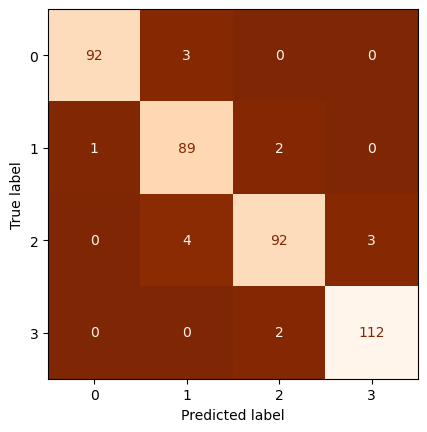

In [44]:
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test, colorbar=False, cmap='Oranges_r')
plt.grid(False)

In [45]:
df_test.drop("id", axis = 1, inplace = True)

In [46]:
df_test['price_range']=model.predict(df_test);df_test

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0             1043     1          1.8         1  14       0           5   
1              841     1          0.5         1   4       1          61   
2             1807     1          2.8         0   1       0          27   
3             1546     0          0.5         1  18       1          25   
4             1434     0          1.4         0  11       1          49   
..             ...   ...          ...       ...  ..     ...         ...   
995           1700     1          1.9         0   0       1          54   
996            609     0          1.8         1   0       0          13   
997           1185     0          1.4         0   1       1           8   
998           1533     1          0.5         1   0       0          50   
999           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193        3  ...        226      1412  3476    12     7   
1      0.8        191        5  ...        746       857  3895     6     0   
2      0.9        186        3  ...       1270      1366  2396    17    10   
3      0.5         96        8  ...        295      1752  3893    10     0   
4      0.5        108        6  ...        749       810  1773    15     8   
..     ...        ...      ...  ...        ...       ...   ...   ...   ...   
995    0.5        170        7  ...        644       913  2121    14     8   
996    0.9        186        4  ...       1152      1632  1933     8     1   
997    0.5         80        1  ...        477       825  1223     5     0   
998    0.4        171        2  ...         38       832  2509    15    11   
999    0.1        140        6  ...        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  price_range  
0            2        0             1     0            3  
1            7        1             0     0            3  
2           10        0             1     1            2  
3            7        1             1     0            3  
4            7        1             0     1            1  
..         ...      ...           ...   ...          ...  
995         15        1             1     0            2  
996         19        0             1     1            1  
997         14        1             0     0            0  
998          6        0             1     0            2  
999          3        1             0     1            2  

[1000 rows x 21 columns]

### Voila!! here is our test set with the predicted values of the price range.

## Let's compare those values distribution with the ones from the train set which were perfectly balanced.

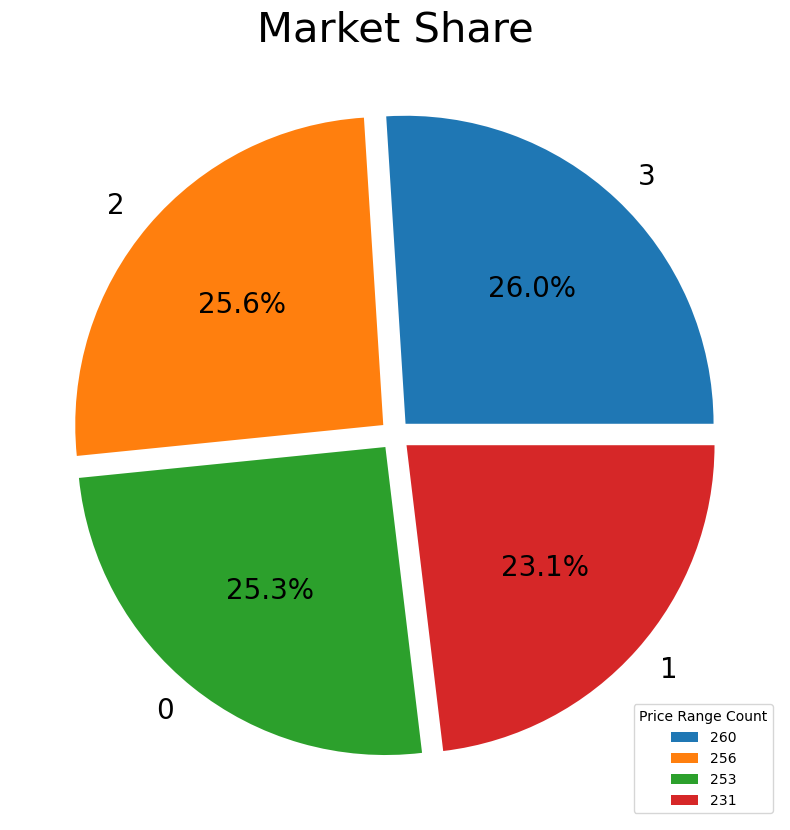

In [47]:
labels = df_test.price_range.value_counts().index
sizes = df_test.price_range.value_counts()

plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, 
        explode=[0.05, 0.05, 0.05, 0.05])
plt.title('Market Share',color = 'black',fontsize = 30)
plt.legend(df_test['price_range'].value_counts(), loc = 'lower right', title = 'Price Range Count')
plt.show()

# Conclusion:

### As we can see they are not perfectly or evenly balanced ot distributed which makes perfect sense, with the **very high cost mobile phones having the highest market share**.

# Saving the Model:

In [48]:
filename = "model"
pickle.dump(model, open(filename, 'wb'))